In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

link of data : https://www.kaggle.com/datasets/prathamtripathi/drug-classification

In [131]:
df=pd.read_csv('/content/drug200.csv')

In [132]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


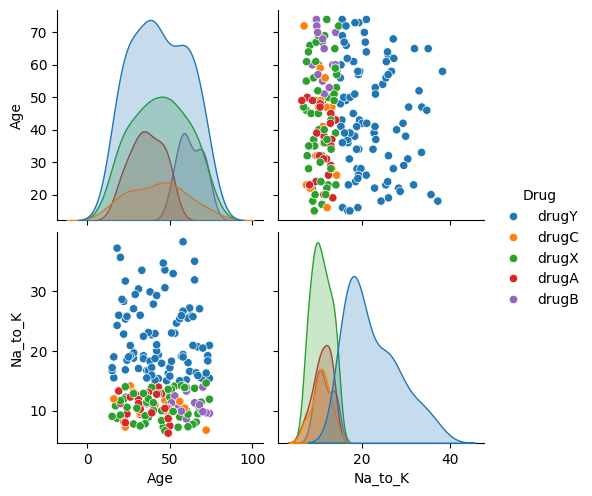

In [133]:
sns.pairplot(df,hue='Drug')

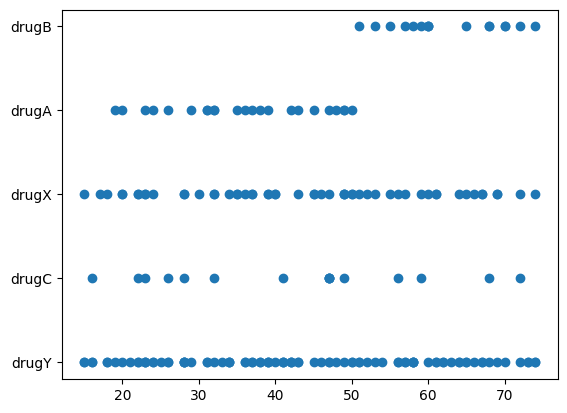

In [134]:
df['Drug_numeric'] = pd.factorize(df['Drug'])[0]

# Now use this numerical column for the color argument
plt.scatter(df['Age'],df['Drug'])
plt.show()

(array([91.,  0., 16.,  0.,  0., 54.,  0., 23.,  0., 16.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

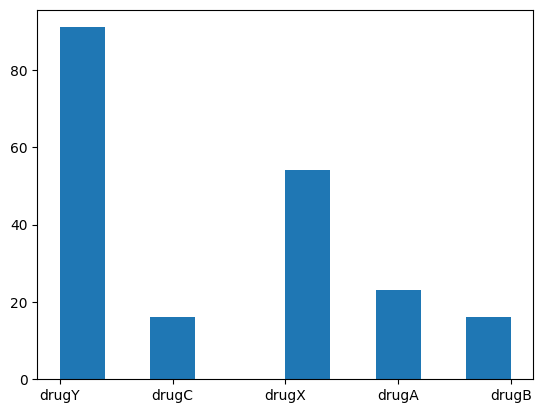

In [135]:
plt.hist(df['Drug'])

(array([ 6.,  1.,  3.,  2.,  4.,  6.,  7.,  4.,  1.,  4.,  0.,  9.,  1.,
         4.,  6.,  1.,  7.,  4.,  5.,  3.,  6.,  3.,  8.,  4.,  0.,  4.,
         2., 10.,  7.,  5.,  4.,  2.,  3.,  3.,  4.,  4.,  5.,  3.,  9.,
         2.,  1.,  3.,  4.,  2.,  8.,  3.,  3.,  0.,  4.,  6.]),
 array([15.  , 16.18, 17.36, 18.54, 19.72, 20.9 , 22.08, 23.26, 24.44,
        25.62, 26.8 , 27.98, 29.16, 30.34, 31.52, 32.7 , 33.88, 35.06,
        36.24, 37.42, 38.6 , 39.78, 40.96, 42.14, 43.32, 44.5 , 45.68,
        46.86, 48.04, 49.22, 50.4 , 51.58, 52.76, 53.94, 55.12, 56.3 ,
        57.48, 58.66, 59.84, 61.02, 62.2 , 63.38, 64.56, 65.74, 66.92,
        68.1 , 69.28, 70.46, 71.64, 72.82, 74.  ]),
 <BarContainer object of 50 artists>)

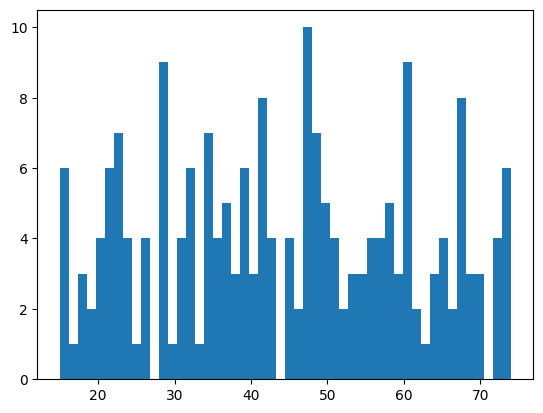

In [136]:
plt.hist(df['Age'],bins=50)


In [138]:
df['Drug_numeric'] = pd.factorize(df['Drug'])[0] # replace cat with int
df['Drug_numeric'].unique()


array([0, 1, 2, 3, 4])

In [140]:


# Find the unique Drug values and their corresponding numerical representations
drug_mapping = dict(zip(df['Drug'].unique(), df['Drug_numeric'].unique()))

# Print the mapping to see which Drug corresponds to 0 and 4
print(drug_mapping)


{'drugY': 0, 'drugC': 1, 'drugX': 2, 'drugA': 3, 'drugB': 4}


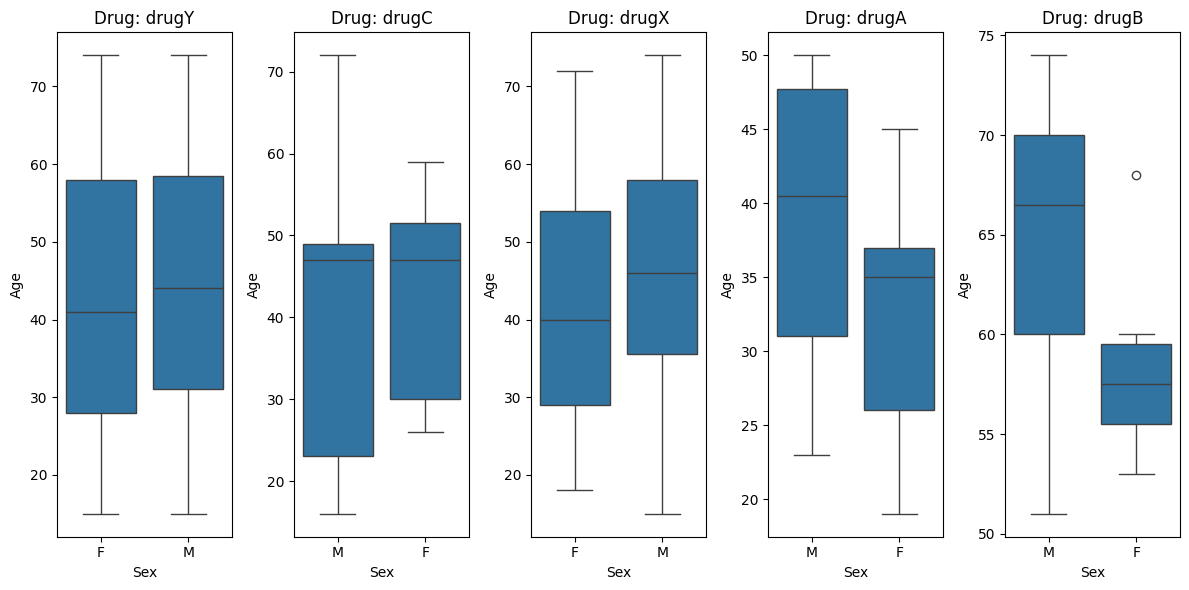

In [141]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create boxplots for each drug, grouped by sex
for drug in df['Drug'].unique():
  plt.subplot(1, len(df['Drug'].unique()), list(df['Drug'].unique()).index(drug) + 1)  # Create subplots for each drug
  sns.boxplot(x='Sex', y='Age', data=df[df['Drug'] == drug])  # Box plot of age for each sex, filtered by drug
  plt.title(f'Drug: {drug}')
  plt.tight_layout()


plt.show()


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           200 non-null    int64  
 1   Sex           200 non-null    object 
 2   BP            200 non-null    object 
 3   Cholesterol   200 non-null    object 
 4   Na_to_K       200 non-null    float64
 5   Drug          200 non-null    object 
 6   Drug_numeric  200 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [143]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0
Drug_numeric,0


In [144]:
df.duplicated().sum()

0

In [145]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_numeric
0,23,F,HIGH,HIGH,25.355,drugY,0
1,47,M,LOW,HIGH,13.093,drugC,1
2,47,M,LOW,HIGH,10.114,drugC,1
3,28,F,NORMAL,HIGH,7.798,drugX,2
4,61,F,LOW,HIGH,18.043,drugY,0


In [146]:
df.drop('Drug',axis=1,inplace=True)

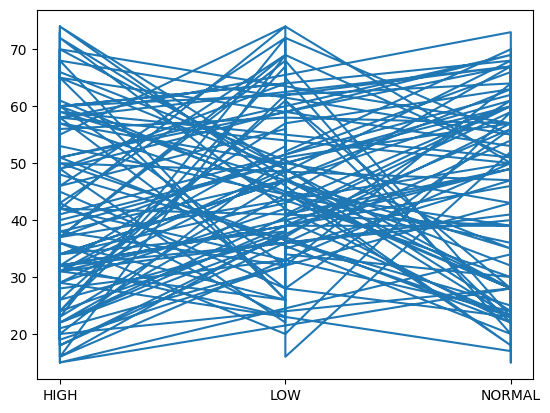

In [147]:
plt.plot(df['BP'],df['Age'])

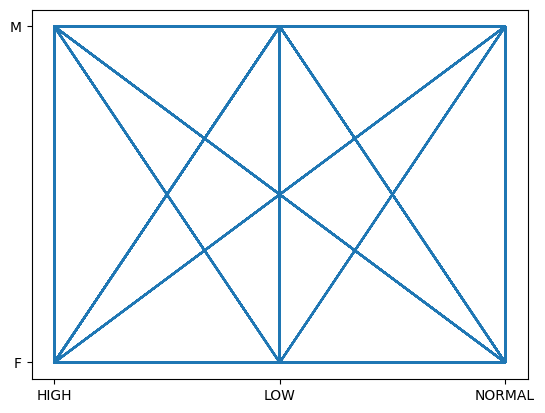

In [148]:
plt.plot(df['BP'],df['Sex'])

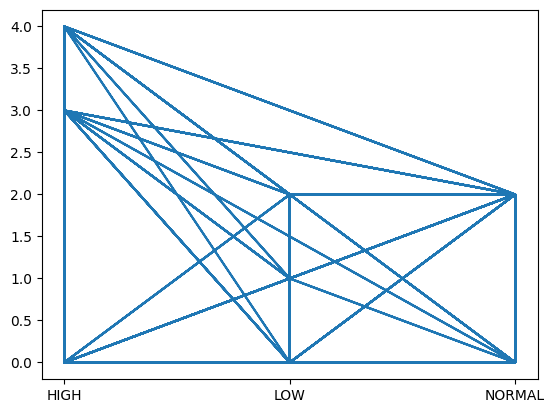

In [149]:
plt.plot(df['BP'],df['Drug_numeric'])

**Standarization**

In [150]:
x=df.drop('Drug_numeric',axis=1)
y=df['Drug_numeric']
numeric=x.select_dtypes(include=['int64','float64']).columns.tolist()
numeric

['Age', 'Na_to_K']

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
scaler=MinMaxScaler()

In [153]:
for col in numeric:
  x[col]=scaler.fit_transform(x[[col]])



In [154]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,F,HIGH,HIGH,0.596848
1,0.542373,M,LOW,HIGH,0.213397
2,0.542373,M,LOW,HIGH,0.120239
3,0.220339,F,NORMAL,HIGH,0.047814
4,0.779661,F,LOW,HIGH,0.368191


**Encoder**

In [155]:
from sklearn.preprocessing import LabelEncoder

In [156]:
x['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [157]:
x['Sex'].unique()

array(['F', 'M'], dtype=object)

In [158]:
x['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [159]:
le=LabelEncoder()
categorical_columns=['Cholesterol','Sex','BP']
for col in categorical_columns:
  x[col]=le.fit_transform(x[col])
  BP_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  print(BP_mapping)

{'HIGH': 0, 'NORMAL': 1}
{'F': 0, 'M': 1}
{'HIGH': 0, 'LOW': 1, 'NORMAL': 2}


In [160]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,0,0,0,0.596848
1,0.542373,1,1,0,0.213397
2,0.542373,1,1,0,0.120239
3,0.220339,0,2,0,0.047814
4,0.779661,0,1,0,0.368191


**modelling**

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn=KNeighborsClassifier()

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
grid=GridSearchCV(knn,param_grid={'n_neighbors':np.arange(1,100)},cv=5,scoring='accuracy')

In [166]:
grid.fit(x_train, y_train)
best_k = grid.best_params_['n_neighbors']
print(f"Meilleure valeur de k : {best_k}")



Meilleure valeur de k : 1


In [167]:
print(grid.best_score_)

0.8375


In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
tree=DecisionTreeClassifier()

In [170]:
tree.fit (x_train,y_train)

DecisionTreeClassifier()

In [171]:
y_pred=tree.predict(x_test)

In [172]:
print(tree.score(x_test,y_test))

1.0


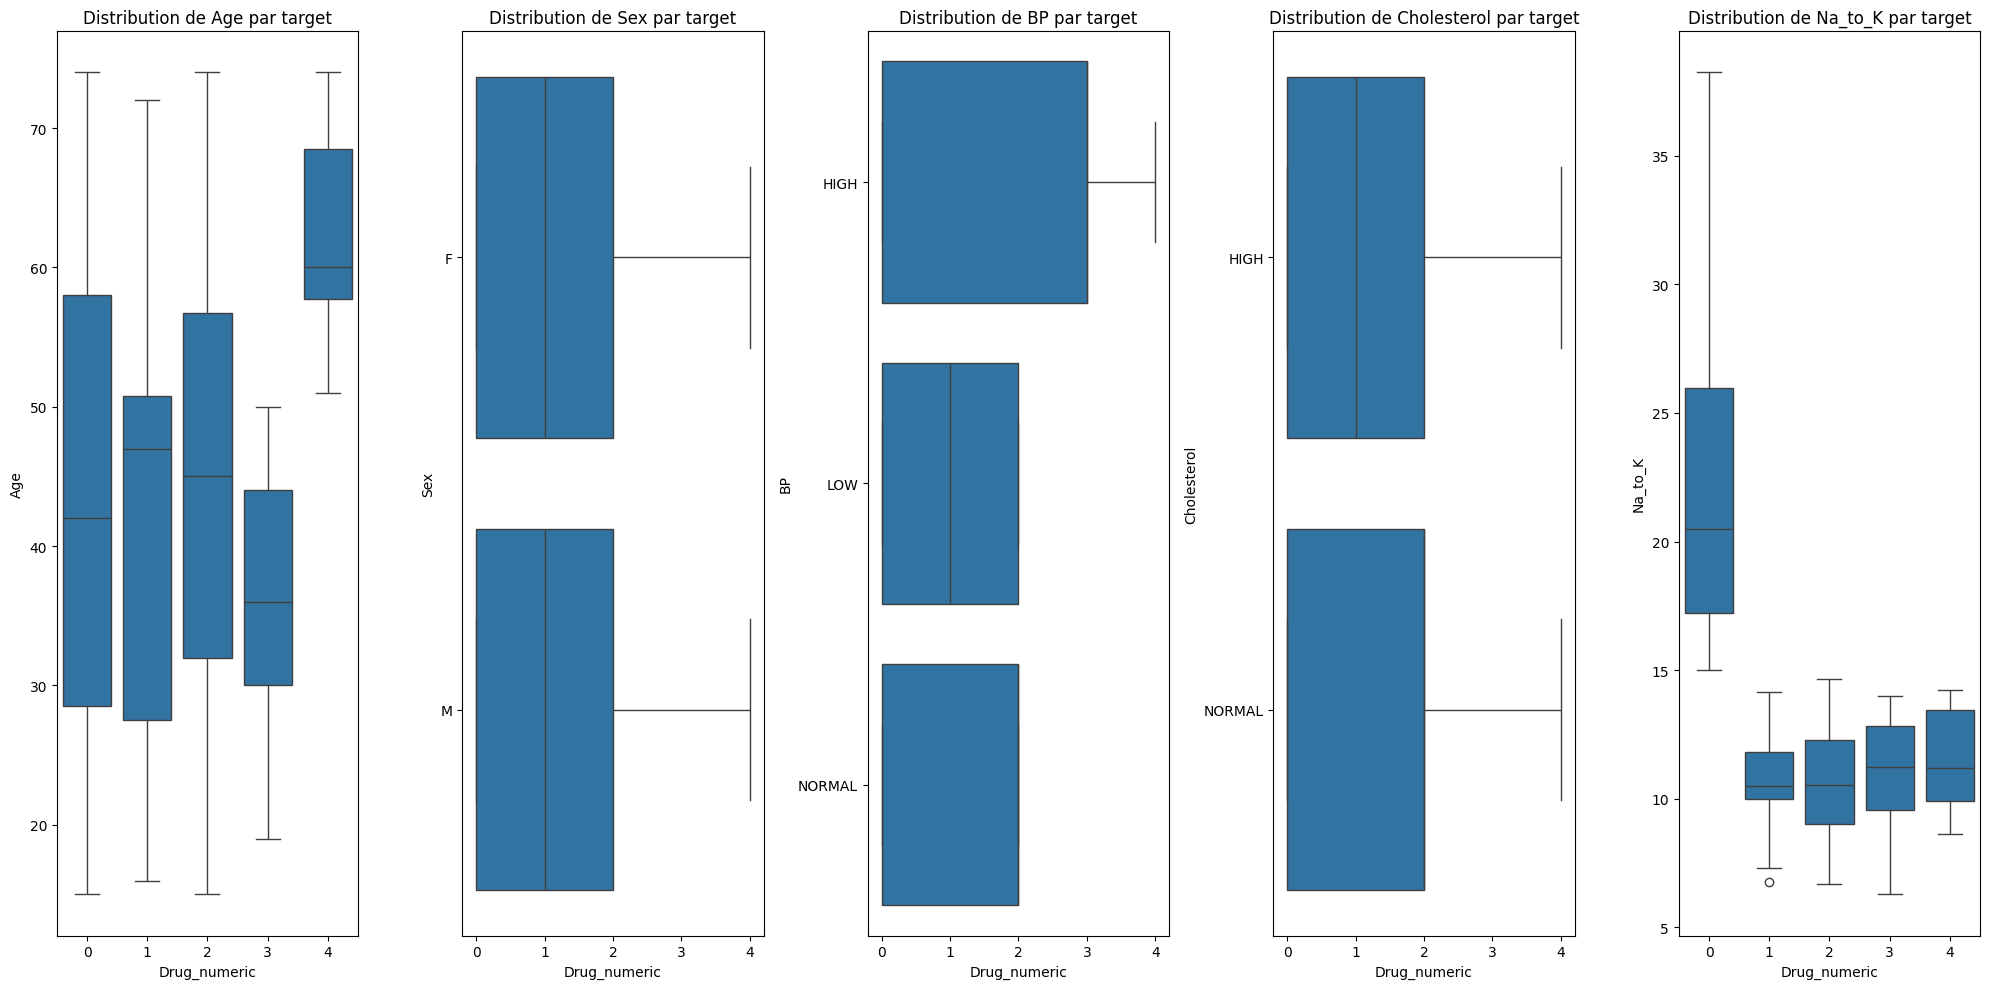

In [173]:
#tester avec nouvelle données
plt.figure(figsize=(20, 10))

for i, col in enumerate(x.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(1, len(x.select_dtypes(include=['int64', 'float64']).columns), i + 1)
    sns.boxplot(x='Drug_numeric', y=col, data=df)
    plt.title(f'Distribution de {col} par target')

plt.tight_layout()
plt.show()

In [174]:
def predict_drug(age, sex, bp, cholesterol, na_to_k):
    x=np.array([[age, sex, bp, cholesterol, na_to_k]])
    tree.predict(x)
    return tree.predict(x)

In [179]:
predict_drug(0.14,0,0,0,0.63397)

array([0])